<a href="https://colab.research.google.com/github/girlwcode/2021DataYouthCampus/blob/master/Week2/5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의사결정 나무 실습

python의 scikit-learn 패키지를 이용해 의사결정 나무를 직접 실행해보자.

### 데이터 불러오기 및 분할하기

로지스틱 회귀분석과 SVM 때 사용했던 [cancer dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset)을 그대로 사용하자.

In [20]:
from sklearn import datasets
import numpy as np
data = datasets.load_breast_cancer()

x = data['data']
y = data['target']

print(data.target_names,x.shape, y.shape)

['malignant' 'benign'] (569, 30) (569,)


In [2]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 - 6:2:2 비율
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(341, 30) (114, 30) (114, 30)


### 모델 학습 및 평가하기

Scikit-learn의 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier) 모델을 사용하면 수업 시간에 다루었던 의사결정 나무 모델을 만들어 볼 수 있다.

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
# 의사결정 나무 모델 학습하기
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

학습 상태를 점검하기 위해 training과 validation data에 대한 정확도 및 confusion matrix를 확인해 보자. (실습!!)

accuracy:  1.0


Text(91.68, 0.5, 'predicted label')

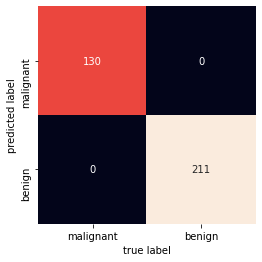

In [40]:
# TODO: training accuracy 및 confusion matrix
pred_train = tree.predict(x_train)

# 학습한 모델로 정확도 및 confusion matrix 구하기
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


print("accuracy: ", accuracy_score(y_train, pred_train))

mat = confusion_matrix(y_train, pred_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

accuracy:  0.9210526315789473


Text(91.68, 0.5, 'predicted label')

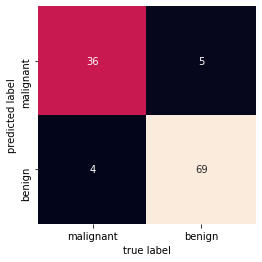

In [41]:
# TODO: validation accuracy 및 confusion matrix
pred_val = tree.predict(x_val)
accuracy_score(y_val,pred_val)

print("accuracy: ", accuracy_score(y_val, pred_val))

mat = confusion_matrix(y_val, pred_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

accuracy:  0.8947368421052632


Text(91.68, 0.5, 'predicted label')

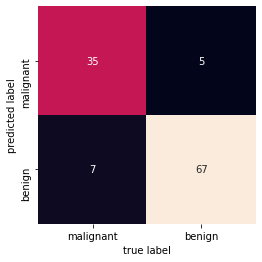

In [42]:
# TODO: test accuracy 및 confusion matrix
pred_test = tree.predict(x_test)
accuracy_score(y_test,pred_test)

print("accuracy: ", accuracy_score(y_test,pred_test))

mat = confusion_matrix(y_test,pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

수업 시간에 배웠던 내용을 떠올리며, training과 validation 성능의 차이를 줄일 수 있는 간단한 방법을 생각해 보자.

In [43]:
# TODO: 보다 좋은 의사결정 나무 모델 만들기
print("leaves :", tree.get_n_leaves())
print("depth: ",tree.get_depth())

# 의사결정 나무 모델 학습하기
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
tree.fit(x_train, y_train)


leaves : 13
depth:  6


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

accuracy:  0.9912023460410557


Text(91.68, 0.5, 'predicted label')

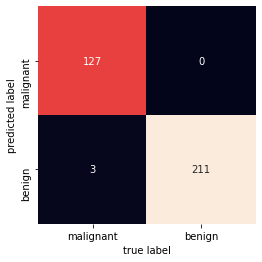

In [44]:
# TODO: training accuracy 및 confusion matrix
pred_train = tree.predict(x_train)

# 학습한 모델로 정확도 및 confusion matrix 구하기
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


print("accuracy: ", accuracy_score(y_train, pred_train))

mat = confusion_matrix(y_train, pred_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

accuracy:  0.9473684210526315


Text(91.68, 0.5, 'predicted label')

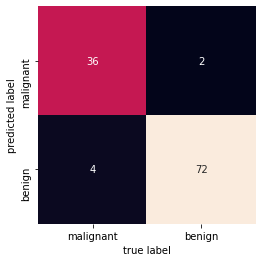

In [45]:
# TODO: validation accuracy 및 confusion matrix
pred_val = tree.predict(x_val)
accuracy_score(y_val,pred_val)

print("accuracy: ", accuracy_score(y_val, pred_val))

mat = confusion_matrix(y_val, pred_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

accuracy:  0.8947368421052632


Text(91.68, 0.5, 'predicted label')

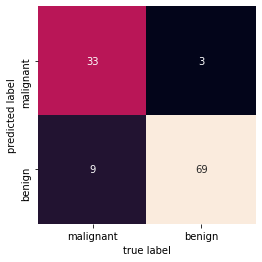

In [46]:
# TODO: test accuracy 및 confusion matrix
pred_test = tree.predict(x_test)
accuracy_score(y_test,pred_test)

print("accuracy: ", accuracy_score(y_test,pred_test))

mat = confusion_matrix(y_test,pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')